In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import math
from numpy import genfromtxt
import png
from numpy import genfromtxt
from PIL import Image    
from matplotlib.colors import ListedColormap
import scipy.linalg as la
from sklearn.decomposition import PCA
import csv
from sklearn.cluster import KMeans
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D

# Aesthetics
sns.set_style("whitegrid")

KeyboardInterrupt: 

In [57]:
# Read in csv
calibri_df = pd.read_csv('CALIBRI.csv')
courier_df = pd.read_csv('COURIER.csv')
times_df = pd.read_csv('TIMES.csv')

#Display Dataframe
calibri_df.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,CALIBRI,CALIBRI LIGHT,65059,0.4,0,0.0,41,20,7,27,...,255,255,255,86,1,1,1,1,1,1
1,CALIBRI,CALIBRI LIGHT,65058,0.4,0,0.0,40,0,5,20,...,1,1,1,1,1,1,1,1,255,255
2,CALIBRI,CALIBRI LIGHT,65057,0.4,0,0.0,38,20,10,29,...,1,1,1,1,1,1,1,1,97,255
3,CALIBRI,CALIBRI LIGHT,65056,0.4,0,0.0,38,0,6,20,...,1,1,1,1,1,1,1,1,1,1
4,CALIBRI,CALIBRI LIGHT,64260,0.4,0,0.0,38,22,46,46,...,145,255,45,1,1,1,1,1,189,255


In [58]:
# 3 df in a list
dataframes = [calibri_df, courier_df, times_df]

# list unwanted columns
discard = ['fontVariant', 'm_label', 'orientation', 'm_top', 'm_left', 'originalH', 'originalW', 'h', 'w']

# discard unwanted columns
calibri_df.drop(columns = discard, inplace = True)
courier_df.drop(columns = discard, inplace = True)
times_df.drop(columns = discard, inplace = True)

In [59]:
# keep only normal characters
cl1 = calibri_df[(calibri_df["strength"] == 0.4) & (calibri_df['italic'] == 0)]
cl2 = courier_df[(courier_df['strength'] == 0.4) & (courier_df['italic'] == 0)]
cl3 = times_df[(times_df['strength'] == 0.4) & (times_df['italic'] == 0)]

In [60]:
print(len(cl1), len(cl2), len(cl3))

4768 4262 4805


In [61]:
# stack 3 classes on top of each other
df = pd.concat([cl1, cl2, cl3], ignore_index=True)

In [62]:
# Standardize Data
scaler = StandardScaler()
scaler.fit(df.iloc[:,3:])
sdf = scaler.transform(df.iloc[:,3:])

# Store standarized dataset into df
sdf = pd.DataFrame(sdf, columns = df.iloc[:,3:].columns)

# include class column
sdf = sdf.join(df.iloc[:,0])

In [64]:
pca = PCA(.95)
pca.fit(sdf.iloc[:,:400])

sdf = pca.transform(sdf.iloc[:,:400])
sdf = pd.DataFrame(sdf)
sdf = sdf.join(df.iloc[:,0])

In [66]:
corr_sdf = sdf.iloc[:,:127].corr()

In [1]:
eigen_vals, eigen_vecs = la.eig(corr_sdf)
eigen_vals = eigen_vals.real

NameError: name 'la' is not defined

In [68]:
Ws = pd.DataFrame(eigen_vecs)

# Question 1

In [73]:
k = list(range(1,20))
sum_disp_k = []

for i in k:
    kmeans = KMeans(n_clusters=i, n_init=200, random_state=0)
    kmeans.fit(sdf.iloc[:,:127])
    sum_disp_k.append(kmeans.inertia_)

In [70]:
sum_disp_k

[5258872.716758235,
 4821838.424075908,
 4599460.6627770355,
 4447059.892336649,
 4318716.370912477,
 4222382.327521795,
 4132846.6240189285,
 4044976.534143428,
 3979103.378530127,
 3919671.0175200445]

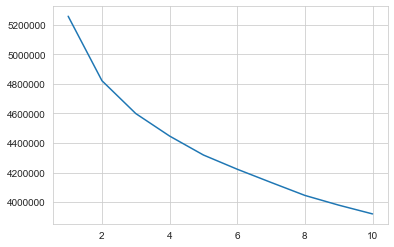

In [71]:
sns.lineplot(x=k, y=sum_disp_k)

In [72]:
kl = KneeLocator(k, sum_disp_k, curve = 'convex', direction = 'decreasing')

In [16]:
perf_k = []
for i in range(0,len(sum_disp_k)):
    perf_k.append(1 - (sum_disp_k[i]/sum_disp_k[0]))

perf_k

[0.0,
 0.08310417768615086,
 0.1253900231251538,
 0.15436948543936346,
 0.17877526163540713,
 0.19702425600741758,
 0.21411384497054642,
 0.23082821129070763,
 0.24335430940359515,
 0.25465565937175305]

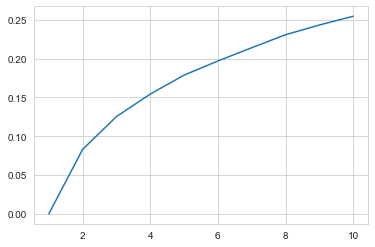

In [17]:
sns.lineplot(x=k, y=perf_k)

In [18]:
kl.elbow

4

In [19]:
kmeans4 = KMeans(n_clusters=4, n_init=50, random_state=0).fit(sdf.iloc[:,:127])

# Question 2

In [20]:
center1 = kmeans4.cluster_centers_[0]
center2 = kmeans4.cluster_centers_[1]
center3 = kmeans4.cluster_centers_[2]
center4 = kmeans4.cluster_centers_[3]

In [21]:
c1 = []
for i in range(0,3):
    c1.append(np.inner(center1,Ws[i]))
c2 = []
for i in range(0,3):
    c2.append(np.inner(center2,Ws[i]))
c3 = []
for i in range(0,3):
    c3.append(np.inner(center3,Ws[i]))
c4 = []
for i in range(0,3):
    c4.append(np.inner(center4,Ws[i]))

In [22]:
coor = pd.DataFrame([c1,c2,c3,c4])

In [23]:
coor

,0,1,2
0,0.354178,0.476313,-0.315328
1,0.126249,-0.216057,1.208369
2,1.242992,0.278542,3.158942
3,-0.710950,-0.195137,-1.772286


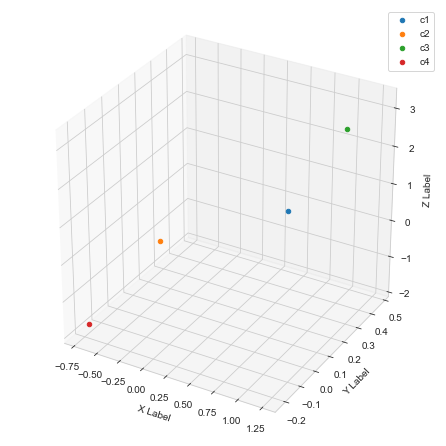

In [24]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)


# plot
sc1 = ax.scatter(coor.iloc[0,0], coor.iloc[0,1], coor.iloc[0,2])
sc2 = ax.scatter(coor.iloc[1,0], coor.iloc[1,1], coor.iloc[1,2])
sc3 = ax.scatter(coor.iloc[2,0], coor.iloc[2,1], coor.iloc[2,2])
sc4 = ax.scatter(coor.iloc[3,0], coor.iloc[3,1], coor.iloc[3,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(labels=['c1','c2','c3','c4'])

In [25]:
clusters_n = pd.DataFrame(kmeans4.labels_)
clusters_n = clusters_n.rename(columns = {0:'cluster'})
cluster_size = pd.DataFrame(pd.Series(kmeans4.labels_).value_counts().sort_index())
cluster_size = cluster_size.rename(columns = {0:'counts'})
cluster_size['cluster'] = ['cl1','cl2','cl3','cl4']

In [26]:
cluster_size

,counts,cluster
0,2477,cl1
1,3161,cl2
2,2328,cl3
3,5869,cl4


In [27]:
clus_4 = sdf.join(clusters_n)
clus_4 = clus_4[clus_4['cluster'] == 3]

In [28]:
bigCLU = cluster_size[cluster_size['counts'] == cluster_size['counts'].max()]['cluster']

In [31]:
pca_model = PCA(n_components=3) 
pca_model.fit(clus_4.iloc[:,:127])

clus3_PCA = pca_model.transform(clus_4.iloc[:,:127])

In [32]:
clus3_PCA = pd.DataFrame(clus3_PCA, index=clus_4.index)
clus3_PCA = clus3_PCA.join(sdf.iloc[:,127])

In [33]:
sdf = sdf.join(clusters_n)

In [34]:
v = clus3_PCA

In [36]:
condlist = [v['font'] == 'CALIBRI',  v['font'] == 'COURIER', v['font'] == 'TIMES']

In [37]:
v['color'] = np.select(condlist, ['red','blue','green'], default=0)

In [38]:
v.font.value_counts()

COURIER    2506
TIMES      2009
CALIBRI    1354
Name: font, dtype: int64

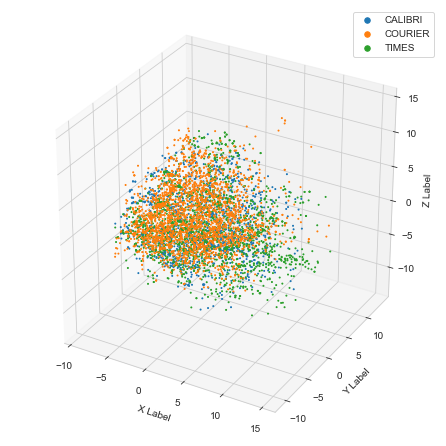

In [39]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)



# plot
sc1 = ax.scatter(v[v['font']=='CALIBRI'][0], v[v['font']=='CALIBRI'][1], v[v['font']=='CALIBRI'][2], alpha = 1, s = 1)
sc2 = ax.scatter(v[v['font']=='COURIER'][0], v[v['font']=='COURIER'][1], v[v['font']=='COURIER'][2], alpha = 1, s = 1)
sc3 = ax.scatter(v[v['font']=='TIMES'][0], v[v['font']=='TIMES'][1], v[v['font']=='TIMES'][2], alpha = 1, s = 1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
lgnd = plt.legend(labels = ['CALIBRI', 'COURIER', 'TIMES'], numpoints=3)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Question 3

In [40]:
fjs0 = sdf[sdf['cluster'] == 0].font.value_counts() / len(sdf[sdf['cluster'] == 0])
fjs1 = sdf[sdf['cluster'] == 1].font.value_counts() / len(sdf[sdf['cluster'] == 1])
fjs2 = sdf[sdf['cluster'] == 2].font.value_counts() / len(sdf[sdf['cluster'] == 2])
fjs3 = sdf[sdf['cluster'] == 3].font.value_counts() / len(sdf[sdf['cluster'] == 3])

In [41]:
fjs0 = fjs0.sort_index()
fjs1 = fjs1.sort_index()
fjs2 = fjs2.sort_index()
fjs3 = fjs3.sort_index()

In [42]:
print(fjs0)
print(fjs1)
print(fjs2)
print(fjs3)

CALIBRI    0.335486
COURIER    0.209931
TIMES      0.454582
Name: font, dtype: float64
CALIBRI    0.604872
COURIER    0.191711
TIMES      0.203417
Name: font, dtype: float64
CALIBRI    0.288230
COURIER    0.270619
TIMES      0.441151
Name: font, dtype: float64
CALIBRI    0.230704
COURIER    0.426989
TIMES      0.342307
Name: font, dtype: float64


In [43]:
FMJs = pd.DataFrame([fjs0.values, fjs1.values, fjs2.values, fjs3.values], columns=['CALIBRI', 'COURIER', 'TIMES'], index = ['Fm1', 'Fm2', 'Fm3', 'Fm4']).transpose()

In [44]:
FMJs

,Fm1,Fm2,Fm3,Fm4
CALIBRI,0.335486,0.604872,0.288230,0.230704
COURIER,0.209931,0.191711,0.270619,0.426989
TIMES,0.454582,0.203417,0.441151,0.342307


In [45]:
print(sdf[sdf['cluster'] == 0].font.value_counts())
print(sdf[sdf['cluster'] == 1].font.value_counts())
print(sdf[sdf['cluster'] == 2].font.value_counts())
print(sdf[sdf['cluster'] == 3].font.value_counts())

TIMES      1126
CALIBRI     831
COURIER     520
Name: font, dtype: int64
CALIBRI    1912
TIMES       643
COURIER     606
Name: font, dtype: int64
TIMES      1027
CALIBRI     671
COURIER     630
Name: font, dtype: int64
COURIER    2506
TIMES      2009
CALIBRI    1354
Name: font, dtype: int64


In [46]:
Cluster1 TIMES      1126
Cluster2 CALIBRI    1905
Cluster3 COURIER    2508
Cluster4 TIMES      1027

SyntaxError: invalid syntax (<ipython-input-46-299a22f79edd>, line 1)

In [47]:
clu1 = {'CALIBRI':fjs0[0] * (1 - fjs0[0]), 'COURIER':fjs0[1] * (1 - fjs0[1]), 'TIMES': fjs0[2] * (1 - fjs0[2])}
clu2 = {'CALIBRI':fjs1[0] * (1 - fjs1[0]), 'COURIER':fjs1[1] * (1 - fjs1[1]), 'TIMES': fjs1[2] * (1 - fjs1[2])}
clu3 = {'CALIBRI':fjs2[0] * (1 - fjs2[0]), 'COURIER':fjs2[1] * (1 - fjs2[1]), 'TIMES': fjs2[2] * (1 - fjs2[2])}
clu4 = {'CALIBRI':fjs3[0] * (1 - fjs3[0]), 'COURIER':fjs3[1] * (1 - fjs3[1]), 'TIMES': fjs3[2] * (1 - fjs3[2])}

In [48]:
clu1 = pd.DataFrame.from_dict(clu1, orient = 'index', columns = ['gini_index'])
clu2 = pd.DataFrame.from_dict(clu2, orient = 'index', columns = ['gini_index'])
clu3 = pd.DataFrame.from_dict(clu3, orient = 'index', columns = ['gini_index'])
clu4 = pd.DataFrame.from_dict(clu4, orient = 'index', columns = ['gini_index'])


In [49]:
clu1['imp'] = sum(clu1['gini_index'])
clu2['imp'] = sum(clu2['gini_index'])
clu3['imp'] = sum(clu3['gini_index'])
clu4['imp'] = sum(clu4['gini_index'])

In [50]:
print(clu1)
print(clu2)
print(clu3)
print(clu4)

         gini_index       imp
CALIBRI    0.222935  0.636733
COURIER    0.165860  0.636733
TIMES      0.247937  0.636733
         gini_index       imp
CALIBRI    0.239002  0.555998
COURIER    0.154958  0.555998
TIMES      0.162038  0.555998
         gini_index       imp
CALIBRI    0.205154  0.649075
COURIER    0.197384  0.649075
TIMES      0.246537  0.649075
         gini_index       imp
CALIBRI    0.177480  0.647282
COURIER    0.244669  0.647282
TIMES      0.225133  0.647282


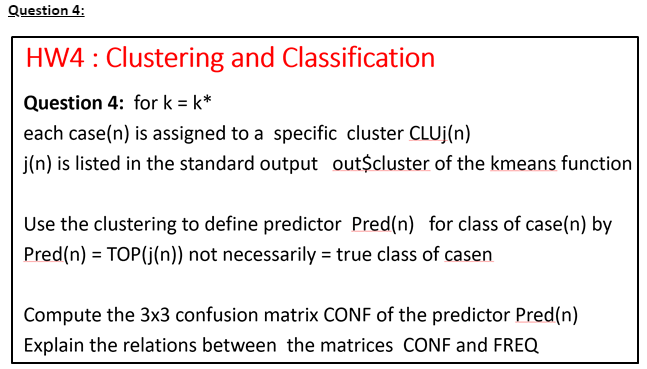

In [51]:
Cluster1 TIMES      1126
Cluster2 CALIBRI    1905
Cluster3 COURIER    2508
Cluster4 TIMES      1027

SyntaxError: invalid syntax (<ipython-input-51-299a22f79edd>, line 1)

In [52]:
condlist = [sdf['cluster'] == 0,  sdf['cluster'] == 1, sdf['cluster'] == 2, sdf['cluster'] == 3]

In [53]:
sdf['Pred(n)'] = np.select(condlist, ['TIMES','CALIBRI','COURIER', 'TIMES'], default=0)

In [54]:
sdf.iloc[:,-3:]

,font,cluster,Pred(n)
0,CALIBRI,1,CALIBRI
1,CALIBRI,2,COURIER
2,CALIBRI,3,TIMES
3,CALIBRI,0,TIMES
4,CALIBRI,1,CALIBRI
5,CALIBRI,1,CALIBRI
6,CALIBRI,3,TIMES
7,CALIBRI,3,TIMES
8,CALIBRI,3,TIMES
9,CALIBRI,1,CALIBRI


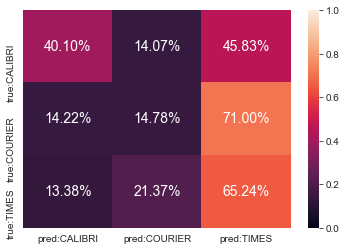

In [55]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(y_true=sdf['font'],y_pred = sdf['Pred(n)'], labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)